# **Lab 6** - Feature Extraction
## B
## Ardian
## 2106638173

### Used Libraries

In [112]:
from skimage import io, util, color, feature, transform, filters, measure
from skimage.transform import resize
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## 1. Daun

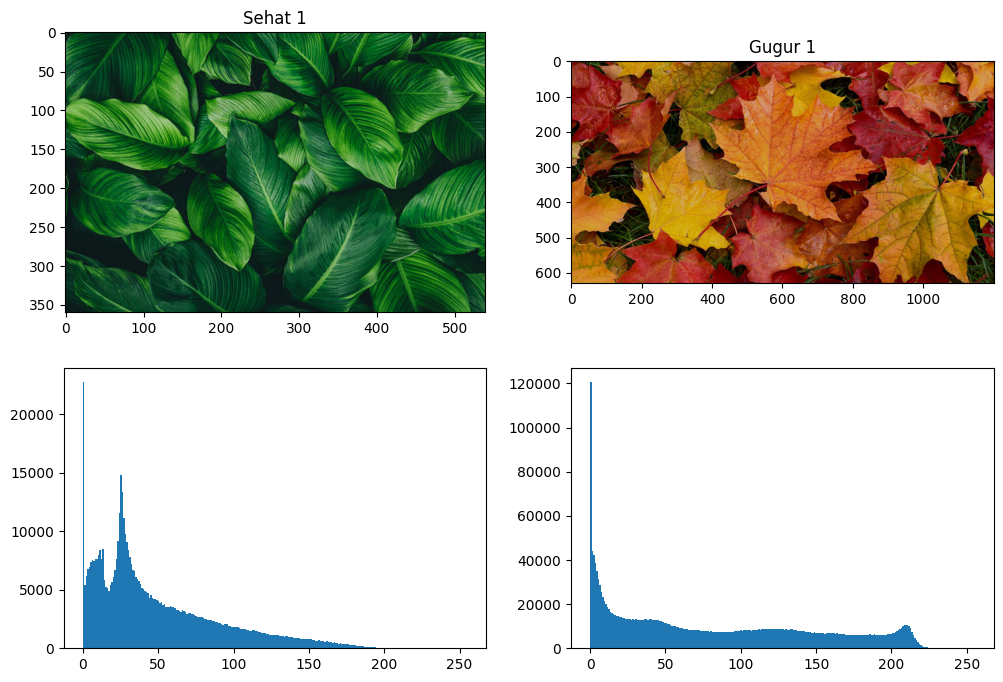

In [4]:
sehat1 = io.imread('/content/Soal 1/sehat1.jpeg')
sehat1_hist = sehat1.flatten()

gugur1 = io.imread('/content/Soal 1/gugur1.jpeg')
gugur1_hist = gugur1.flatten()

plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.imshow(sehat1)
plt.title('Sehat 1')

plt.subplot(2, 2, 2)
plt.imshow(gugur1)
plt.title('Gugur 1')

plt.subplot(2, 2, 3)
plt.hist(sehat1_hist, 256, range = (0, 255))

plt.subplot(2, 2, 4)
plt.hist(gugur1_hist, 256, range = (0, 255))

plt.show()

### a. Buatlah method predict yang menerima parameter nama file dan mengembalikan output “sehat” untuk citra dengan daun yang sehat dan “gugur” untuk citra dengan daun yang gugur dengan menggunakan representasi fitur color image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus di automasi, tidak boleh di-hardcode untuk tiap citra.

In [5]:
def get_RGB_histogram(image, title):
    image_R = image[:, :, 0]
    image_G = image[:, :, 1]
    image_B = image[:, :, 2]

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 2, 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.hist(image_R.flatten(), 256, range=(0, 255))
    plt.title(f'{title} R Histogram')

    plt.subplot(2, 2, 3)
    plt.hist(image_G.flatten(), 256, range=(0, 255))
    plt.title(f'{title} G Histogram')

    plt.subplot(2, 2, 4)
    plt.hist(image_B.flatten(), 256, range=(0, 255))
    plt.title(f'{title} B Histogram')


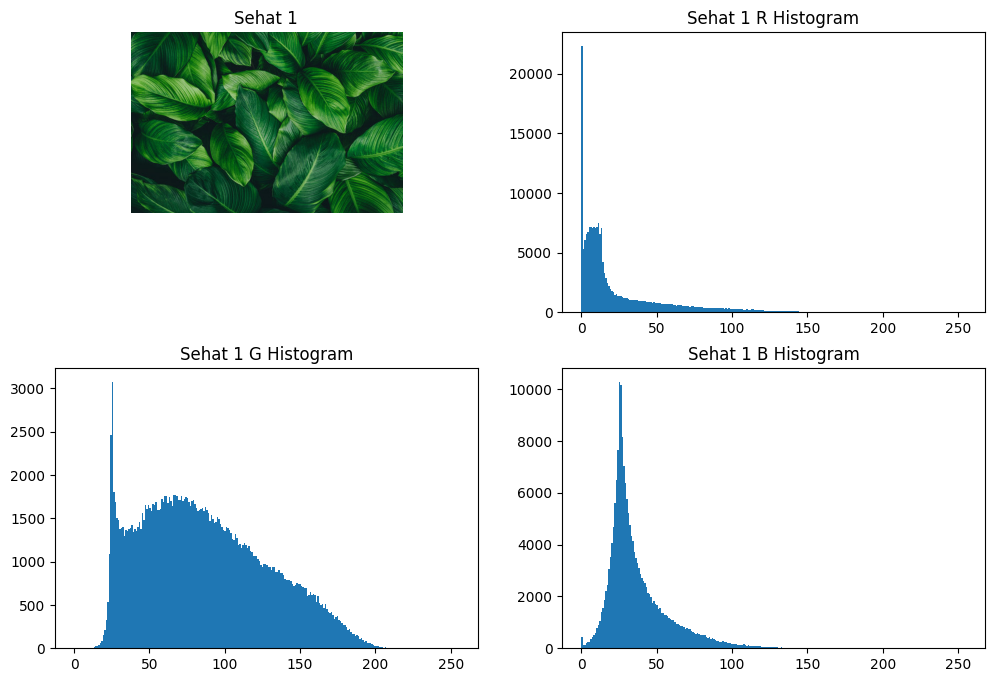

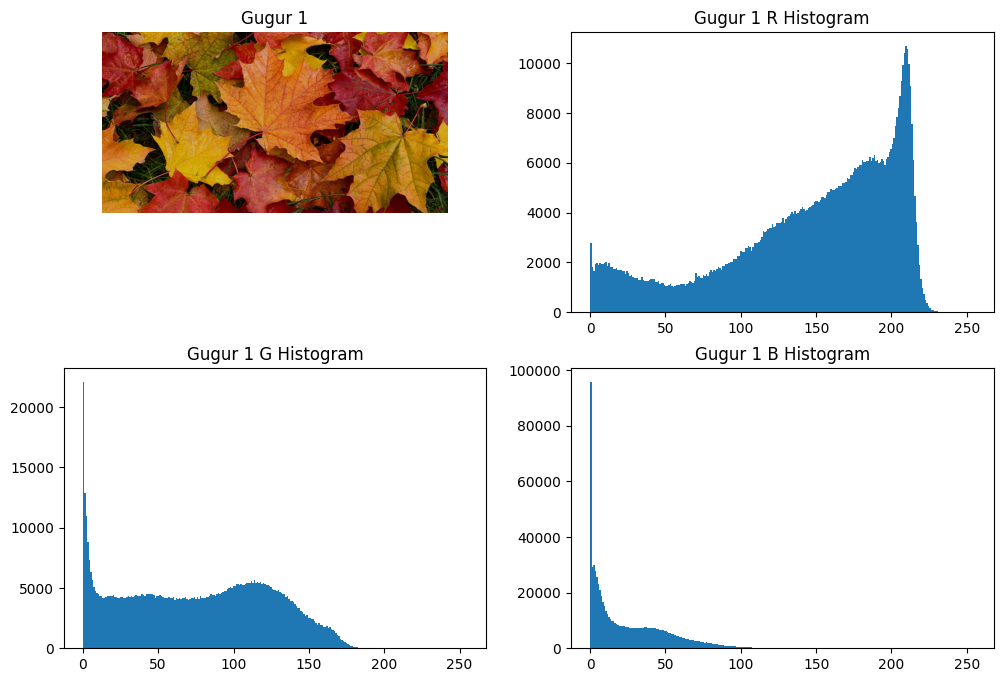

In [6]:
get_RGB_histogram(io.imread('/content/Soal 1/sehat1.jpeg'), 'Sehat 1')
get_RGB_histogram(io.imread('/content/Soal 1/gugur1.jpeg'), 'Gugur 1')

In [113]:
def classify_by_color(file_name):
    img = io.imread(file_name)

    R = img[:, :, 0]
    G = img[:, :, 1]

    R_frequency_count = np.bincount(R.flatten())
    G_frequency_count = np.bincount(G.flatten())

    R_cum_sum = np.cumsum(R_frequency_count)
    G_cum_sum = np.cumsum(G_frequency_count)

    condition_G = G_cum_sum[-1] - G_cum_sum[100] > G_cum_sum[100]
    condition_R = R_cum_sum[100] > (R_cum_sum[-1] - R_cum_sum[100])

    if condition_G or condition_R:
        result = 'SEHAT'
    else:
        result = 'GUGUR'

    return result

In [114]:
for file in os.listdir('/content/Soal 1'):
    if file.lower().endswith(('.jpeg')):
        file_path = os.path.join('/content/Soal 1', file)
        result = classify_by_color(file_path)

        print(f'{file} = {result}\n')

gugur2.jpeg = GUGUR

sehat1.jpeg = SEHAT

sehat3.jpeg = SEHAT

gugur4.jpeg = GUGUR

sehat2.jpeg = SEHAT

gugur3.jpeg = GUGUR

sehat4.jpeg = SEHAT

gugur1.jpeg = GUGUR



### b. [Eksplorasi] Ulangi klasifikasi pada soal (a) menggunakan fitur selain color image histogram.

In [115]:
def classify_by_eccentricity(file_name):
  img_gray = io.imread(file_name, as_gray = True)
  contours = measure.find_contours(img_gray, 0.5)
  binary_image = img_gray > 0.5
  labeled_image = measure.label(binary_image)
  props = measure.regionprops(labeled_image)
  eccentricities = [prop.eccentricity for prop in props]

  if sum(eccentricities) > 1111:
    return 'GUGUR'
  else:
    return 'SEHAT'

In [116]:
for file in os.listdir('/content/Soal 1'):
    if file.lower().endswith(('.jpeg')):
        file_path = os.path.join('/content/Soal 1', file)
        result = classify_by_eccentricity(file_path)

        print(f'{file} = {result}\n')

gugur2.jpeg = GUGUR

sehat1.jpeg = SEHAT

sehat3.jpeg = SEHAT

gugur4.jpeg = GUGUR

sehat2.jpeg = SEHAT

gugur3.jpeg = SEHAT

sehat4.jpeg = SEHAT

gugur1.jpeg = GUGUR



### c. Jelaskan perbedaan dari fitur (a) dan (b) serta berikan pengamatan anda terhadap hasil yang didapatkan.

Fitur (a) fokus pada warna daun secara keseluruhan, sementara fitur (b) lebih memperhatikan bentuk dan struktur daun. Ketika kita melihat warna keseluruhan daun dalam fitur (a), kadang-kadang warna bisa bervariasi tanpa benar-benar menunjukkan kondisi kesehatan daun. Sebaliknya, fitur (b) melihat bentuk dan struktur daun dengan lebih detail, sehingga hasilnya bisa lebih konsisten dan lebih relevan dengan kondisi kesehatan daun. Jadi, perbedaan utamanya adalah di mana fitur (a) lebih fokus pada warna, sedangkan fitur (b) lebih memperhatikan bentuk daun. Dalam kasus ini, fitur (b) tampaknya memberikan hasil yang lebih konsisten dan bermanfaat untuk mengklasifikasikan kesehatan daun.

Berdasarkan hasil yang di dapatkan, fitur (a) menghasilkan klasifikasi yang lebih akurat, ini dikarenakan terdapat perbedaan warna yang cukup jelas antara daun sehat dan gugur. Sementara fitur b terdapat kesalah prediksi, di mana daun gugur diprediksi sebagai daun sehat, ini dikarenakan bentuk daun pada gambar tersebut (terutama berdasarkan pandangan komputasi) memiliki mirip dengan bentuk daun sehat.

## 2. Chess

Text(0.5, 1.0, 'Chess 1')

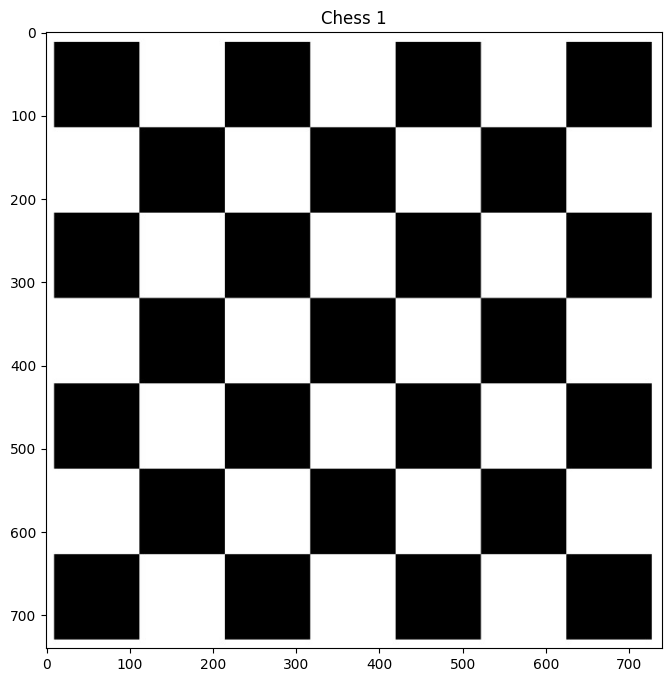

In [5]:
chess1 = io.imread('/content/Soal 2/chess1.jpg')

plt.figure(figsize = (8, 8))
plt.imshow(chess1)
plt.title('Chess 1')

### a. Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengekstrak setiap garis yang ada pada papan-papan catur!

In [56]:
def extract_lines(file_name, title):
  img = io.imread(file_name)
  original_image = np.copy(img)

  gray = (color.rgb2gray(img) * 255).astype(np.uint8)

  edges = cv2.Canny(gray, 50, 150, apertureSize=3)

  lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

  for line in lines:
    for rho, theta in line:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      x1 = int(x0 + 1000 * (-b))
      y1 = int(y0 + 1000 * (a))
      x2 = int(x0 - 1000 * (-b))
      y2 = int(y0 - 1000 * (a))
      cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

  plt.figure(figsize=(20, 10))

  plt.subplot(1, 2, 1)
  plt.title(title)
  plt.imshow(original_image)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"{title}'s lines")
  plt.imshow(img)
  plt.axis('off')

  return lines

chess4.jpg = [[[ 155.           1.5707964]]

 [[1044.           1.5707964]]

 [[ 155.           0.       ]]

 [[ 303.           1.5707964]]

 [[ 748.           1.5707964]]

 [[ 896.           1.5707964]]

 [[ 303.           0.       ]]

 [[ 451.           0.       ]]

 [[ 748.           0.       ]]

 [[ 896.           0.       ]]

 [[1044.           0.       ]]

 [[ 451.           1.5707964]]

 [[ 599.           0.       ]]

 [[ 599.           1.5707964]]

 [[   7.           0.       ]]

 [[1192.           0.       ]]

 [[   7.           1.5707964]]

 [[1192.           1.5707964]]]

chess1.jpg = [[[422.          1.5707964]]

 [[625.          0.       ]]

 [[317.          0.       ]]

 [[522.          0.       ]]

 [[627.          1.5707964]]

 [[319.          1.5707964]]

 [[524.          1.5707964]]

 [[114.          1.5707964]]

 [[112.          0.       ]]

 [[214.          0.       ]]

 [[419.          0.       ]]

 [[216.          1.5707964]]

 [[729.          1.5707964]]

 [[727.

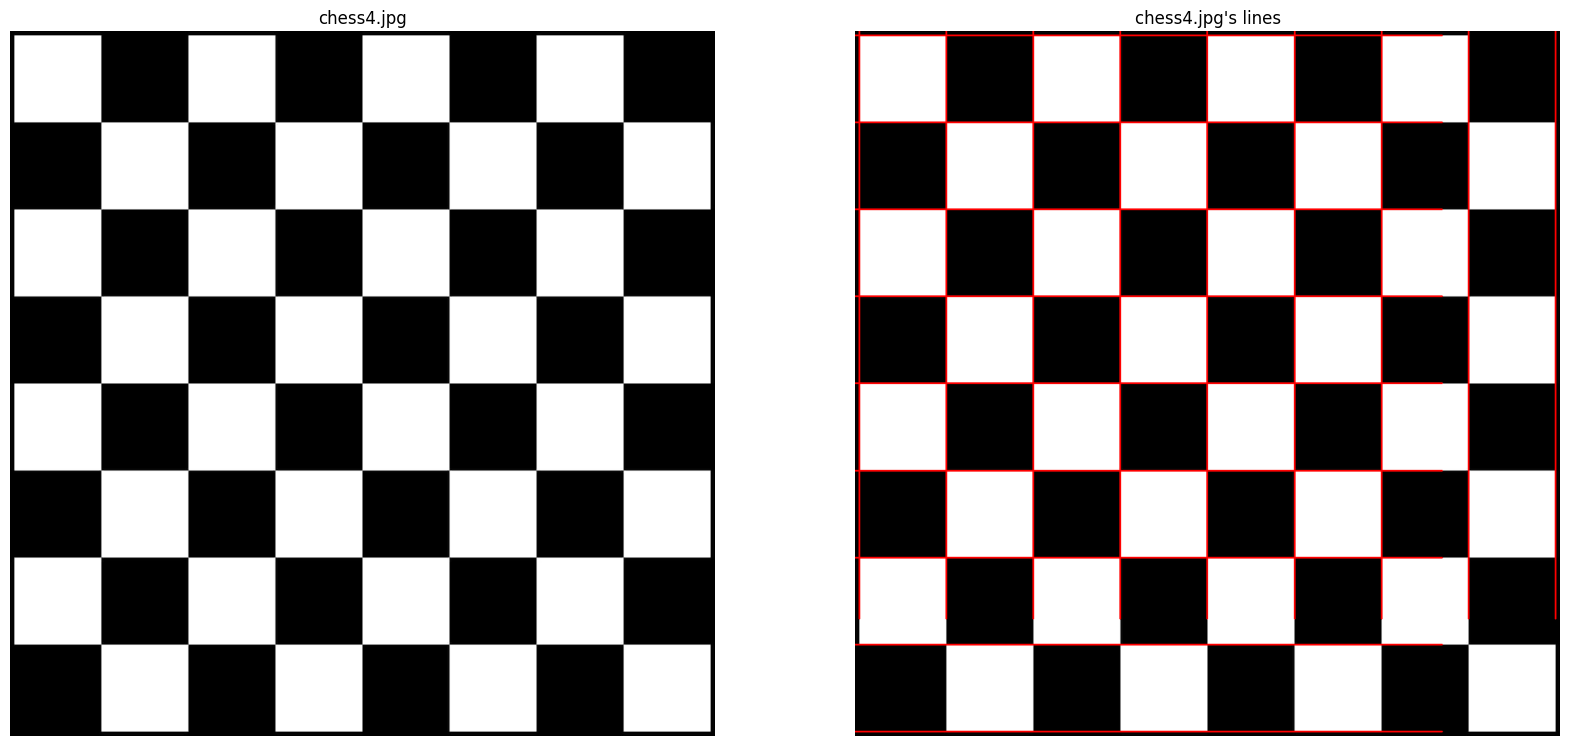

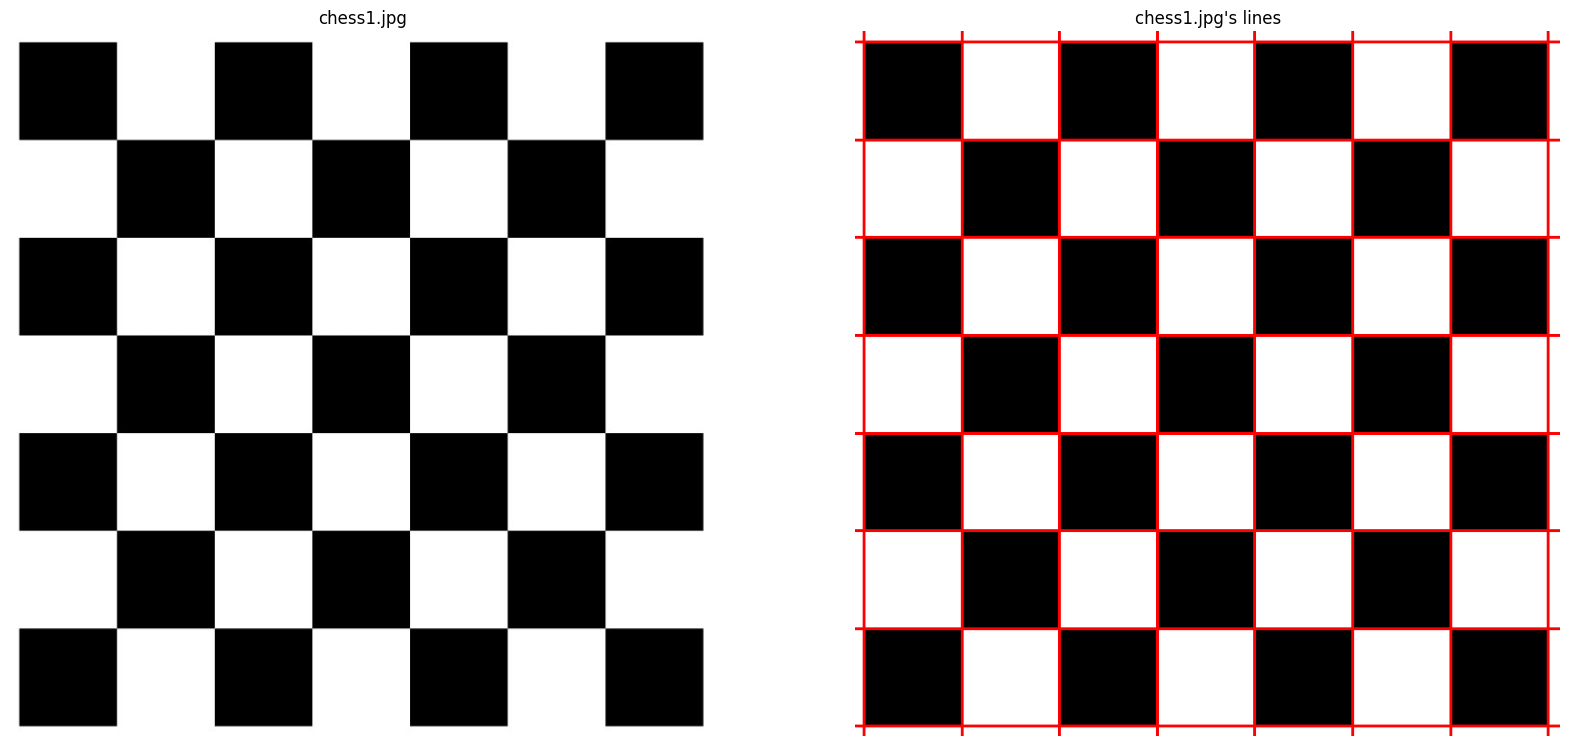

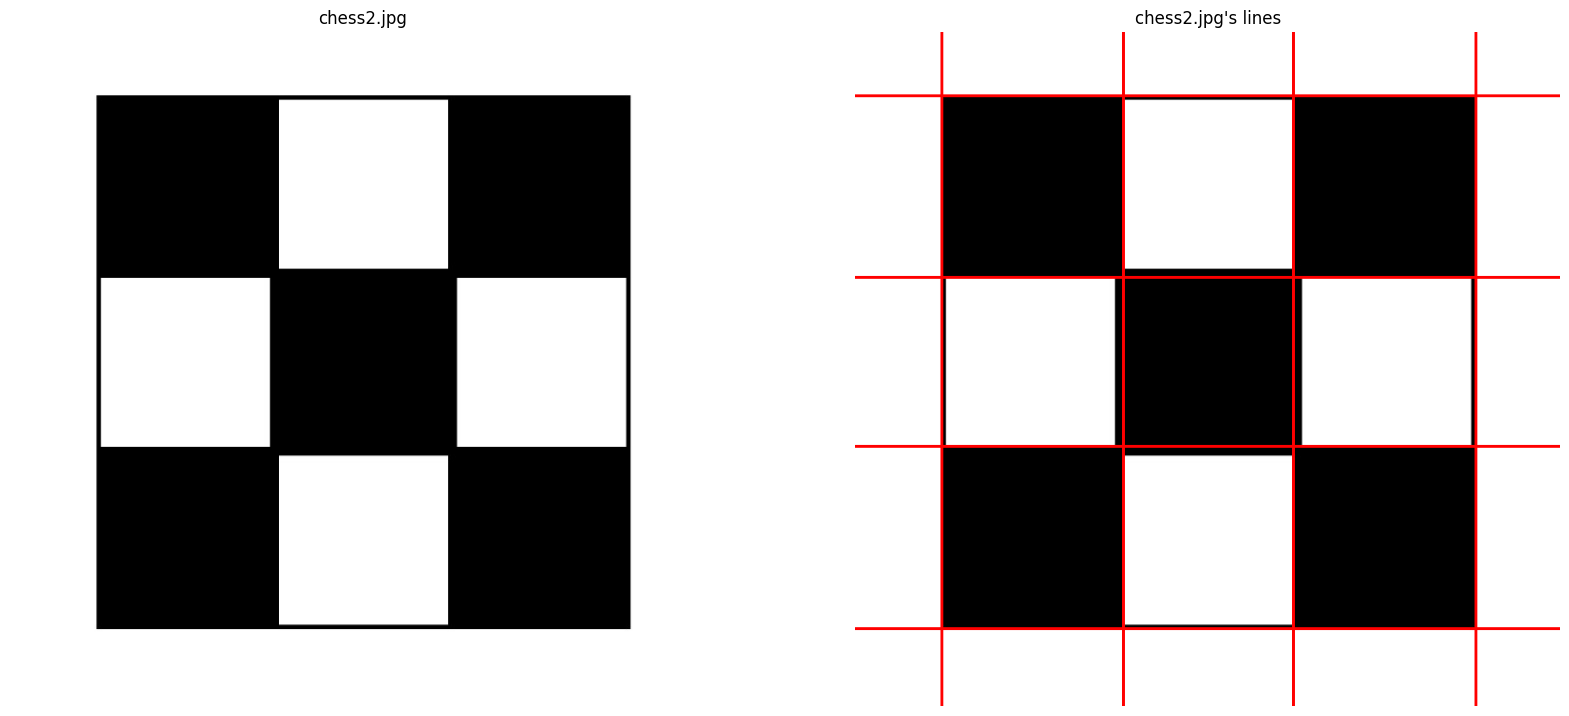

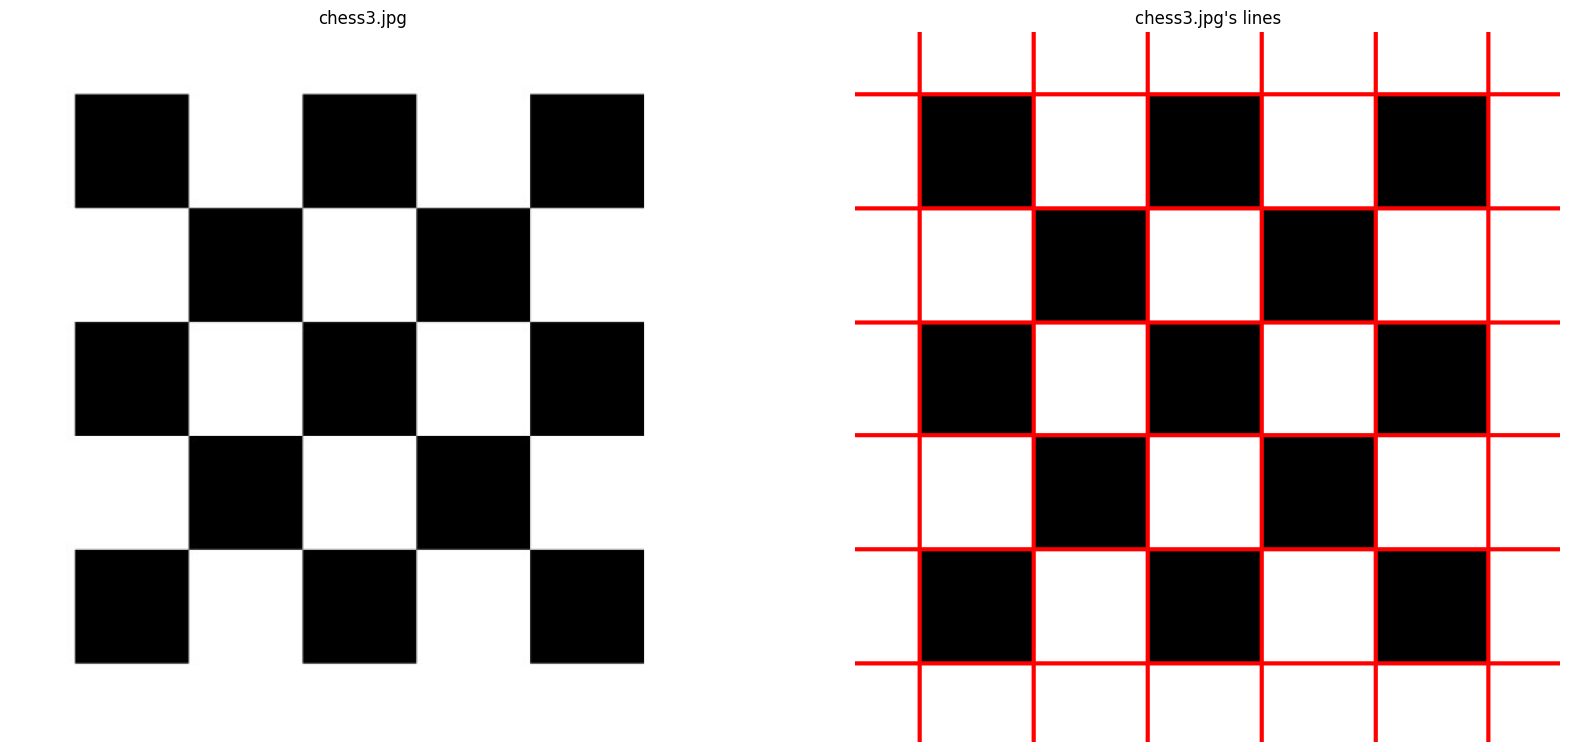

In [111]:
for file in os.listdir('/content/Soal 2'):
    if file.lower().endswith(('.jpg')):
        file_path = os.path.join('/content/Soal 2', file)
        result = extract_lines(file_path, file)

        print(f'{file} = {result}\n')

### b. Tentukan berapa ukuran dari setiap papan catur tersebut (format: 3x3, 4x3, dll) dan luas dari papan jika satu kotak memiliki sisi 3cm!

In [58]:
def get_chessboard_shape_and_size(file_name, title):
  lines = extract_lines(file_name, title)
  num_lines = lines.shape[0]

  shape = (num_lines/2 - 1) ** 2
  size = shape * 9

  shape_formatted = f'{int(np.sqrt(shape))}x{int(np.sqrt(shape))}'

  return f'Ukuran {shape_formatted}, luas {int(size)}cm'

chess4.jpg = Ukuran 8x8, luas 576cm

chess1.jpg = Ukuran 7x7, luas 441cm

chess2.jpg = Ukuran 3x3, luas 81cm

chess3.jpg = Ukuran 5x5, luas 225cm



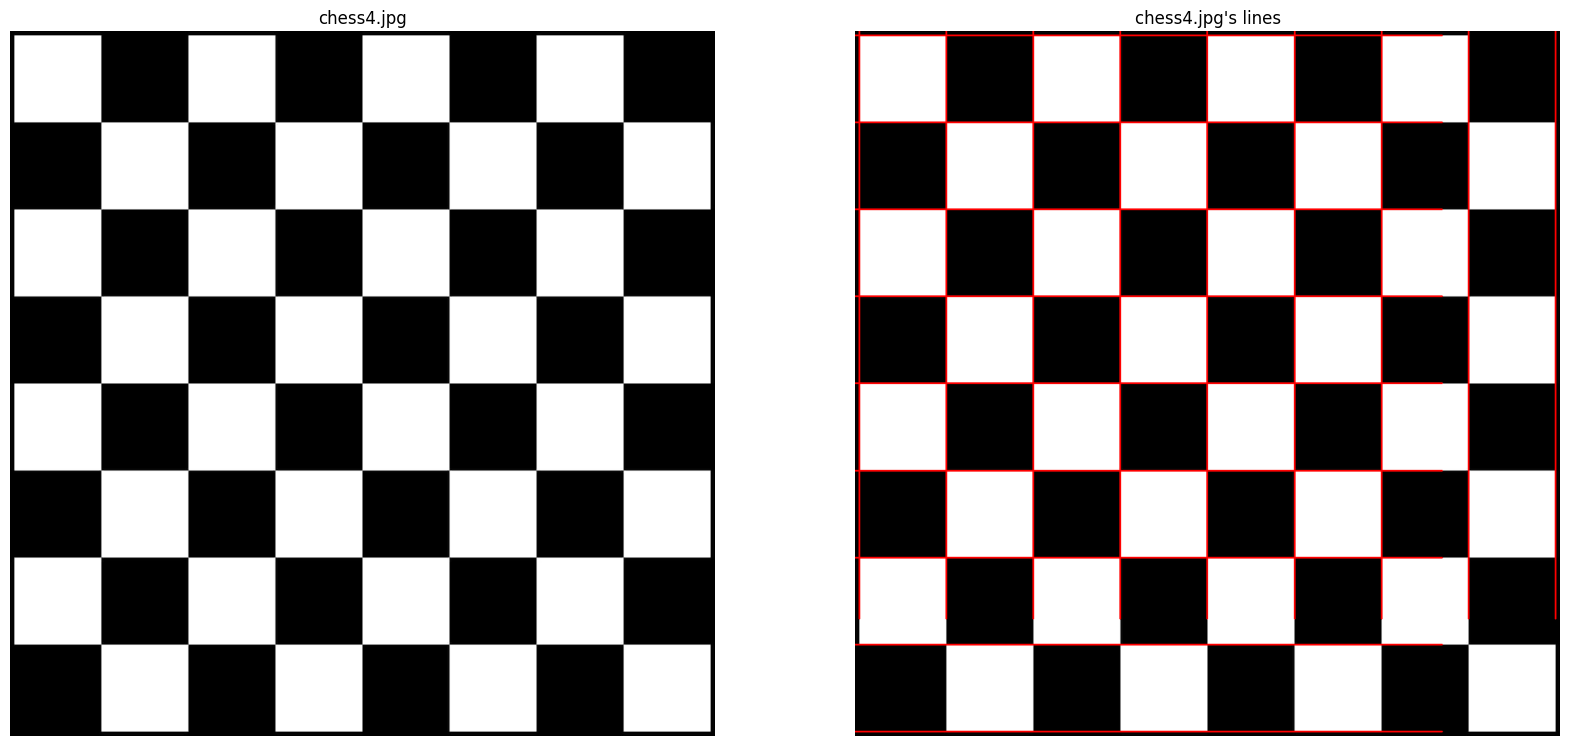

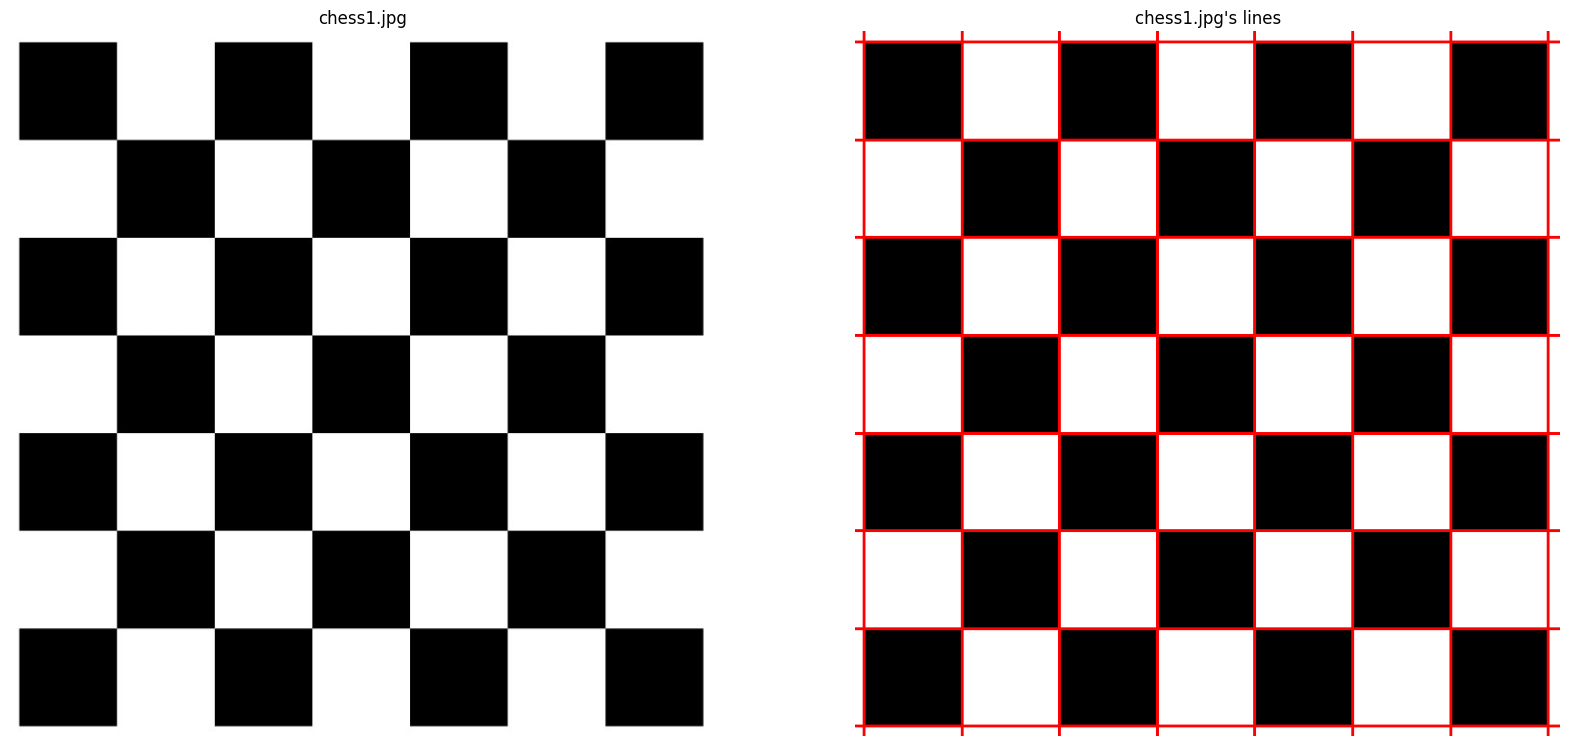

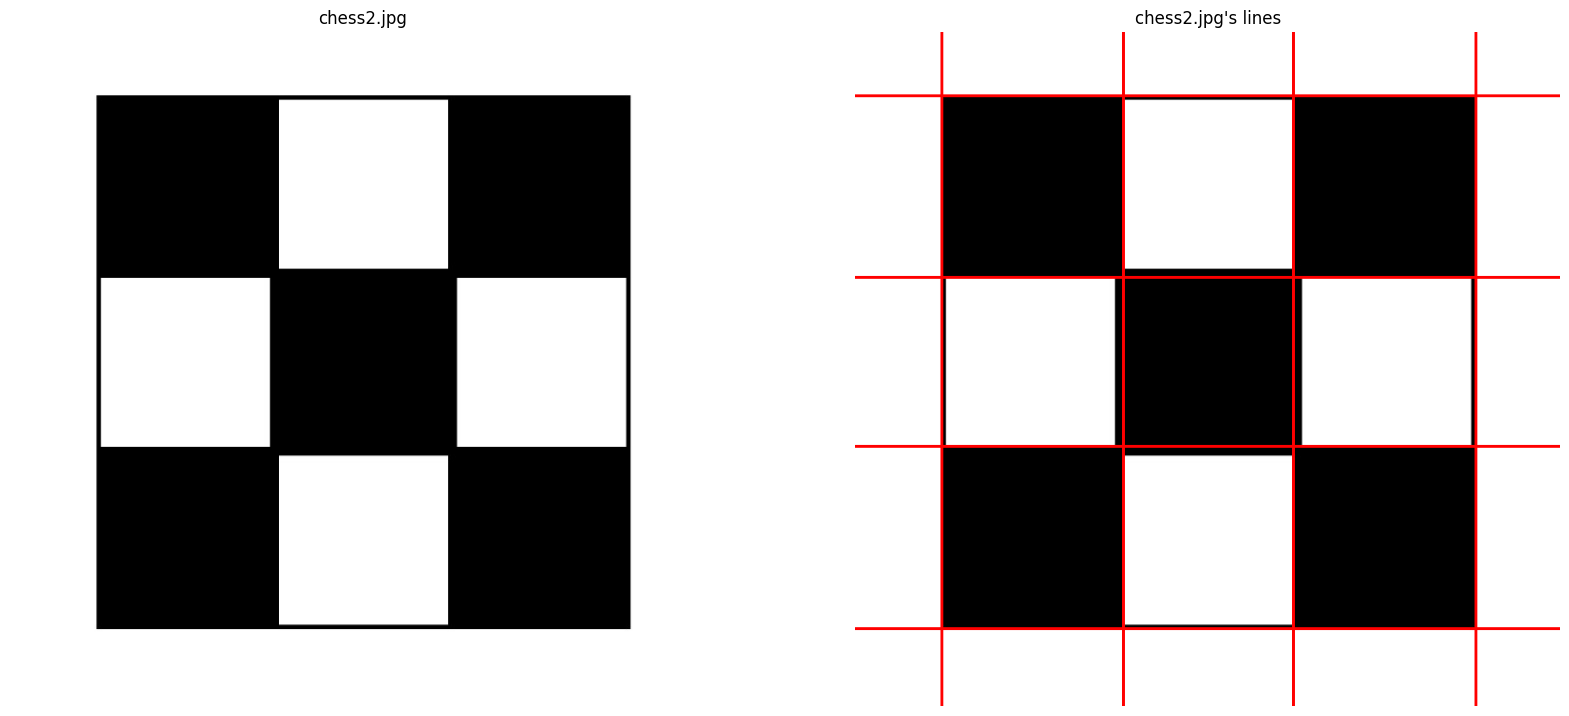

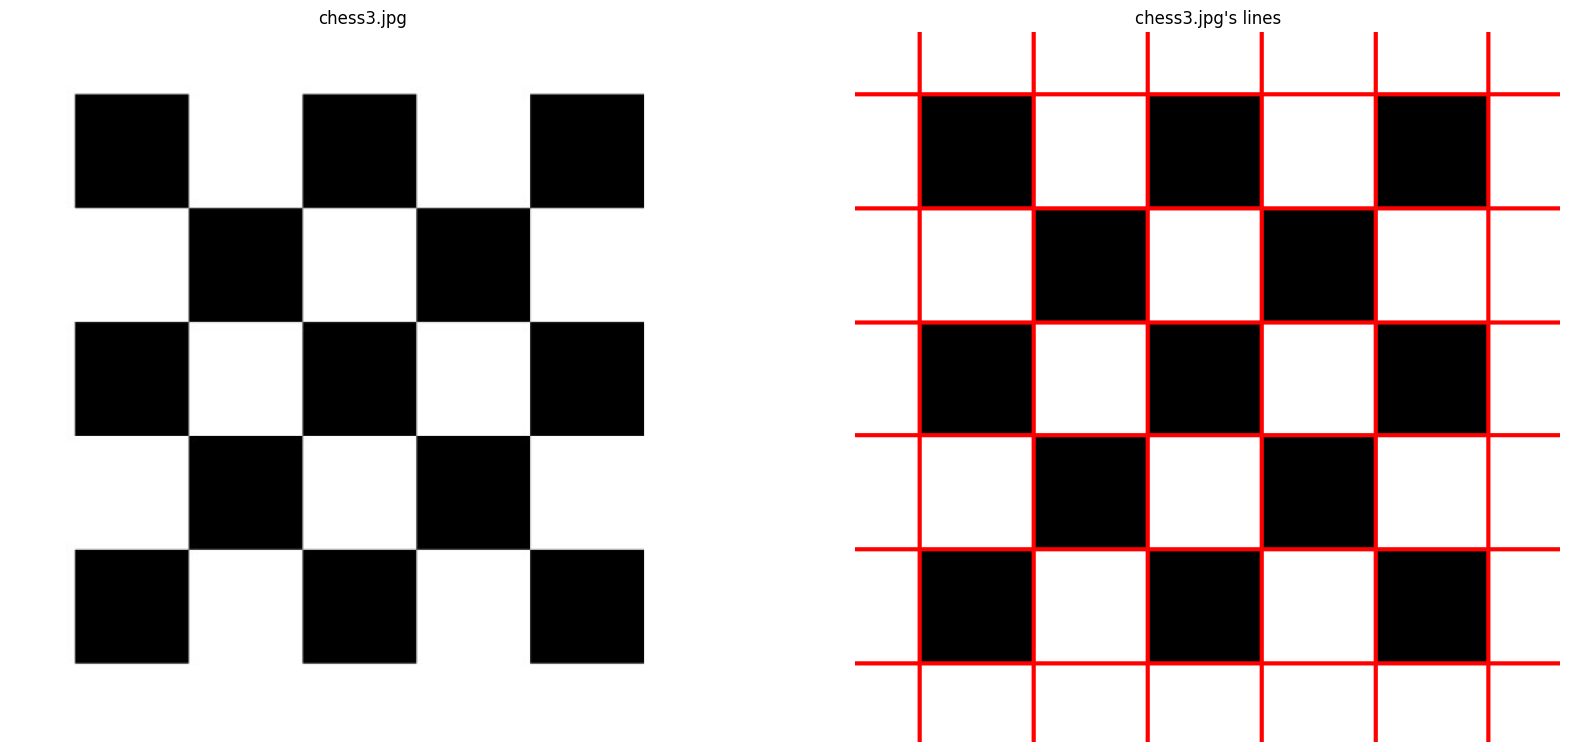

In [59]:
for file in os.listdir('/content/Soal 2'):
  if file.lower().endswith(('.jpg')):
      file_path = os.path.join('/content/Soal 2', file)
      result = get_chessboard_shape_and_size(file_path, file)

      print(f'{file} = {result}\n')

### c. Ceritakan proses yang dilakukan sehingga anda mendapatkan hasil pada soal (a) dan (b).

Pada bagian (a), langkah-langkah yang dilakukan adalah membaca gambar papan catur dan mengubahnya menjadi citra hitam putih untuk mempermudah analisis. Selanjutnya, kita menggunakan algoritma Canny untuk menemukan tepi pada gambar tersebut. Kemudian, menggunakan teknik transformasi Hough, kita dapat mengidentifikasi garis-garis yang ada pada gambar, yang mewakili garis-garis pada papan catur. Kemudian, mengembalikan garis-garis yang telah dihasilkan sembari divisualisasikan juga garis-garis tersebut pada gambar asli.

Pada bagian (b), hasil garis yang telah ditemukan digunakan untuk menghitung jumlah garis, yang pada gilirannya memberikan informasi tentang bentuk papan catur, dan ukurannya dengan asumsi panjang sisi setiap kotak adalah 3cm. Kita dapat mendapatkan bentuk papan catur dengan cara membagikan jumlah garis dengan 2 lalu dikurangi satu lalu dikuadratkan, formula ini dapat digunakan dikarenakan papan catur berbentuk persegi. Kemudian untuk mendapatkan ukuran papan catur, kita tinggal mengalikan bentuk papan dengan 3cm.

## 3. Bendera

Text(0.5, 1.0, 'Bendera Indonesia')

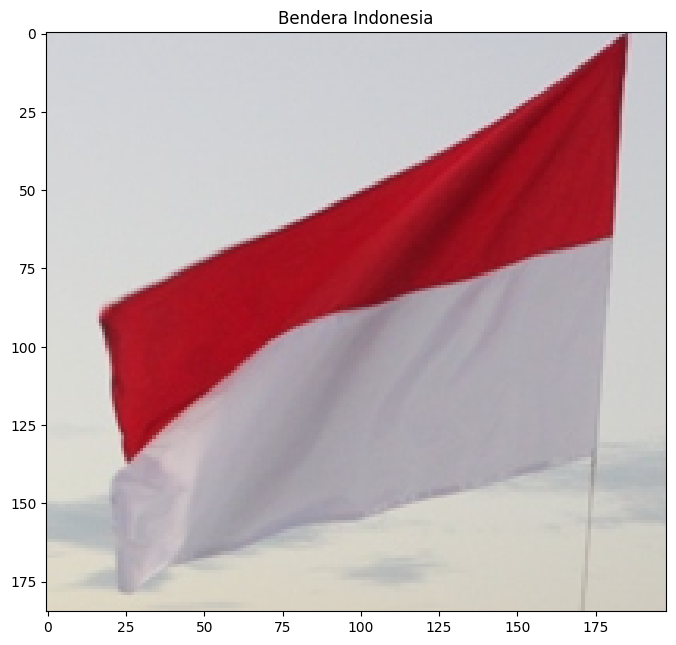

In [62]:
target = io.imread('/content/Soal 3/target.png')

plt.figure(figsize = (8, 8))
plt.imshow(target)
plt.title('Bendera Indonesia')

### a. Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar! Anda bisa menggunakan library OpenCV/Skimage/lainnya.

In [115]:
def match_image(template_file, image_file, title):
  image = io.imread(image_file)
  template = color.rgba2rgb(io.imread(template_file))

  image_gray = util.img_as_ubyte(color.rgb2gray(image))
  template_gray = util.img_as_ubyte(color.rgb2gray(template))

  # Get height and width of template
  h, w = template_gray.shape

  # Match template using cv2.matchTemplate
  result = cv2.matchTemplate(image_gray, template_gray, method=cv2.TM_CCOEFF_NORMED)

  # Copy image for bounding box
  matched = image.copy()

  # Thresholding
  threshold = 0.95
  loc = np.where(result >= threshold)

  # Create bounding box
  for point in zip(*loc[::-1]):
      cv2.rectangle(matched, point, (point[0] + w, point[1] + h), (255, 0, 0), 2)

  # Show image
  plt.figure(figsize=(20, 10))
  plt.subplot(121), plt.imshow(image)
  plt.title(title), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(matched)
  plt.title(f'{title} Template Matched'), plt.xticks([]), plt.yticks([])
  plt.show()


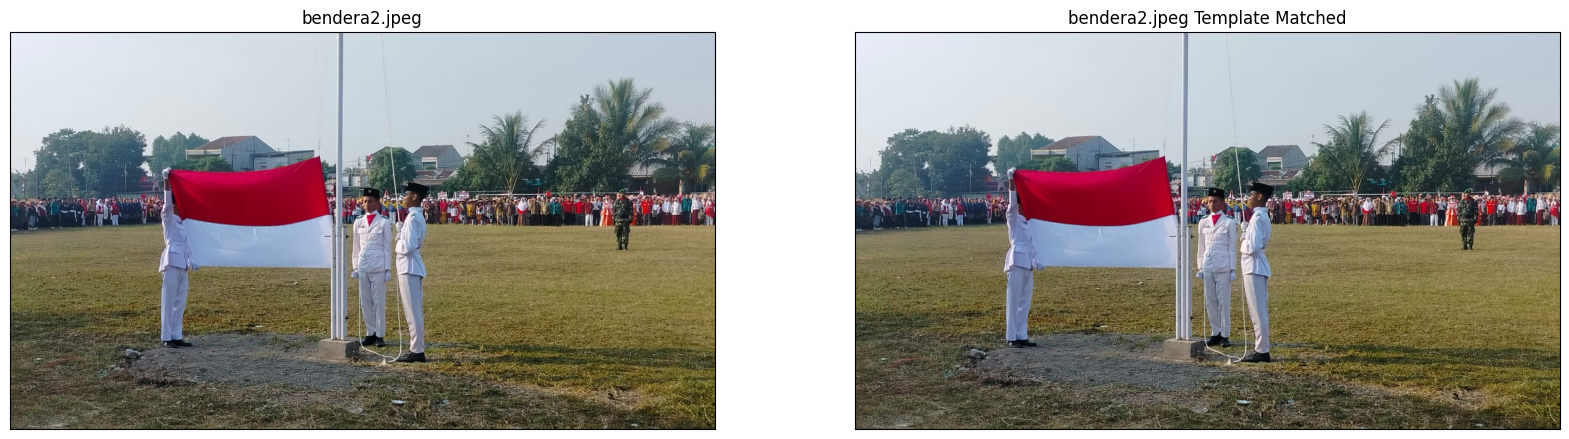

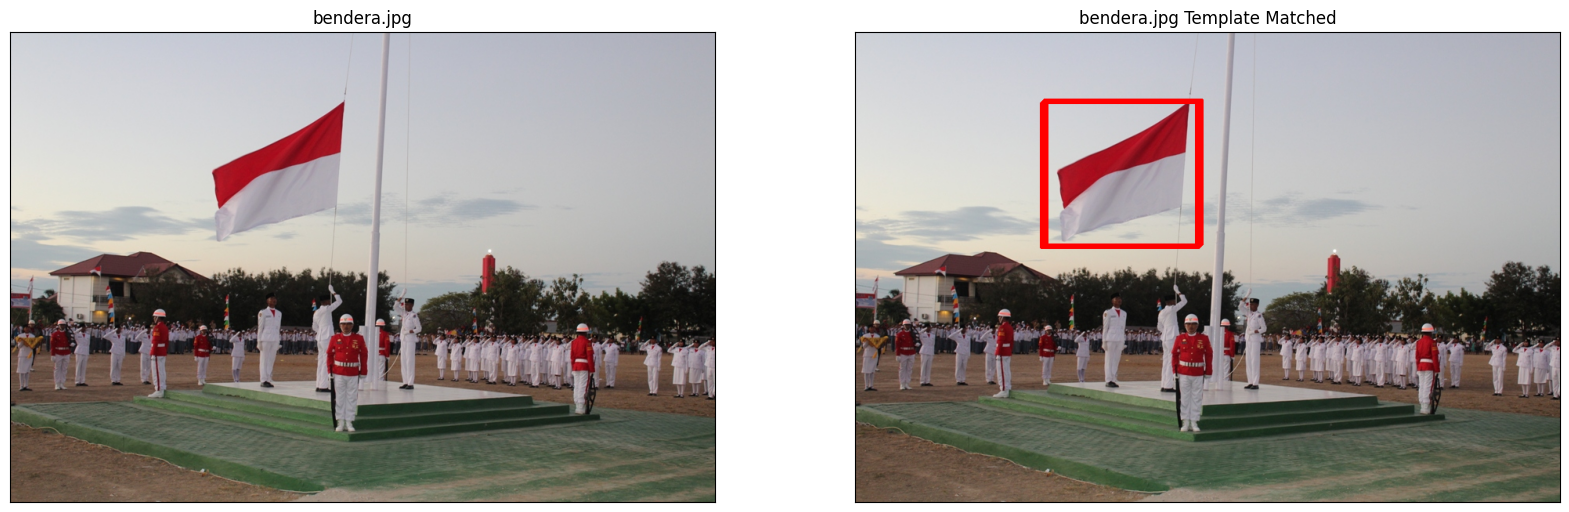

In [116]:
target_path = '/content/Soal 3/target.png'

for file in os.listdir('/content/Soal 3'):
  if file.lower().endswith(('.png')) != True:
      file_path = os.path.join('/content/Soal 3', file)
      match_image(target_path, file_path, file)

### b. Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Mengapa perbedaan ini terjadi?

Pada poin a, gambar bendera.jpg berhasil di-match dengan template target, sementara bendera2.jpg tidak. Ini dikarekan template yang digunakan merupakan pixel bagian dari gambar bendera.jpg.

### c. Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini? Apakah untuk kasus template matching untuk bendera pada gambar upacara cocok?

#### **Kelebihan:**
Metode ini sederhana dan cepat dilakukan. Cocok untuk mencari kemiripan yang tepat pada gambar.

#### **Kekurangan:**
Sensitif terhadap perubahan skala, rotasi, dan distorsi dalam gambar. Selain itu, hasilnya sangat tergantung pada kualitas template yang digunakan.

Untuk bendera pada gambar upcara, tidak cocok, karena template matching sensitif terhadap perubahan skala, rotasi, dan distorsi dalam gambar, serta hasilnya sangat tergantung pada kualitas template yang digunakan. Bendera dalam gambar upacara umumnya memiliki variasi bentuk yang signifikan, sehingga metode ini kurang efektif.